<a href="https://colab.research.google.com/github/NacliNaclo/EDOS/blob/main/medical_robotics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [102]:
import json

In [ ]:
f = open('/content/drive/MyDrive/medical_robotics/v1/v1/frame_data/frame_data000000.json')
data = json.load(f)

In [ ]:
data['camera-pose']

[[0.9999965796048702,
  -0.0025485094056294315,
  -0.0002287824528534348,
  -0.02928418649968023],
 [0.002548294731588833,
  0.9999962957559811,
  -0.0008537852186089054,
  -0.10912194375544004],
 [0.00023095502338880993,
  0.0008533662118120291,
  0.9999997628384426,
  0.3536461362789396],
 [0.0, 0.0, 0.0, 1.0]]

In [ ]:
T_0 = data['camera-pose']

In [ ]:
f1 = open('/content/drive/MyDrive/medical_robotics/v1/v1/frame_data/frame_data000001.json')
data1 = json.load(f1)

In [ ]:
T_1 = data1['camera-pose']
T_1 = np.array(T_1)

In [ ]:
import numpy as np

In [ ]:
T_0 = np.array(T_0)
temp = np.linalg.inv(T_0)
temp

array([[ 9.99996873e-01,  2.54831379e-03,  2.30957505e-04,
         2.94804947e-02],
       [-2.54849153e-03,  9.99996481e-01,  8.53199367e-04,
         1.08745199e-01],
       [-2.28779559e-04, -8.53951957e-04,  9.99999456e-01,
        -3.53745828e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [ ]:
T_0_1 = np.matmul(temp,T_1)
T_0_1

array([[ 9.99996758e-01, -2.66848080e-03, -1.38534687e-04,
        -1.76657959e-02],
       [ 2.66837263e-03,  9.99996429e-01, -8.90276436e-04,
        -1.13811995e-01],
       [ 1.40861180e-04,  8.89828332e-04,  9.99999821e-01,
         2.77779557e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

------------------------------------------------------------------------------------------------------------------------

In [25]:
import os

# folder path
dir_path = r'/content/drive/MyDrive/medical_robotics/v1/v1/frame_data'
count = 0
# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('File count:', count)

File count: 197


In [ ]:
file_num = 000000
tranf_matrices = [0]*196
for i in range(0,count-1): #the upper boundar is exclude
  j = i + 1
  source = '/content/drive/MyDrive/medical_robotics/v1/v1/frame_data/frame_data' + str(file_num + i).zfill(6) + '.json'
  end = '/content/drive/MyDrive/medical_robotics/v1/v1/frame_data/frame_data' + str(file_num + j).zfill(6) + '.json'
  #print(source)
  #print(end)

  f_source = open(source)
  data_source = json.load(f_source)
  T_0 = np.array(data_source['camera-pose'])

  f_end = open(end)
  data_end = json.load(f_end)
  T_1 = np.array(data_end['camera-pose'])

  tranf_matrices[i] = np.matmul(np.linalg.inv(T_0),T_1)

In [101]:
def tranformation_matrix_extrac(folder_path):
  # looking for number of files in the folder
  import os
  count = 0
  # Iterate directory
  for path in os.listdir(folder_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(folder_path, path)):
        count += 1

  file_num = 000000
  tranf_matrices = [0]*(count-1)
  for i in range(0,count-1): #the upper boundar is exclude
    j = i + 1
    source = folder_path + '/frame_data' + str(file_num + i).zfill(6) + '.json'
    end = folder_path + '/frame_data' + str(file_num + j).zfill(6) + '.json'

    f_source = open(source)
    data_source = json.load(f_source)
    T_0 = np.array(data_source['camera-pose'])

    f_end = open(end)
    data_end = json.load(f_end)
    T_1 = np.array(data_end['camera-pose'])

    tranf_matrices[i] = np.matmul(np.linalg.inv(T_0),T_1)

  return tranf_matrices


In [ ]:
a = tranformation_matrix_extrac('/content/drive/MyDrive/medical_robotics/v1/v1/frame_data')

In [ ]:
a

[array([[ 9.99996758e-01, -2.66848080e-03, -1.38534687e-04,
         -1.76657959e-02],
        [ 2.66837263e-03,  9.99996429e-01, -8.90276436e-04,
         -1.13811995e-01],
        [ 1.40861180e-04,  8.89828332e-04,  9.99999821e-01,
          2.77779557e-01],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e+00]]),
 array([[ 9.99997459e-01, -2.14935456e-03, -1.80045045e-04,
         -2.29432294e-02],
        [ 2.14911103e-03,  9.99996531e-01, -9.14354254e-04,
         -1.16719039e-01],
        [ 1.82046030e-04,  9.14121350e-04,  9.99999046e-01,
          2.94969340e-01],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e+00]]),
 array([[ 9.99999795e-01, -7.91099422e-04, -2.52924488e-04,
         -3.22080909e-02],
        [ 7.91033391e-04,  1.00000014e+00, -8.00094799e-04,
         -1.01397841e-01],
        [ 2.53586418e-04,  7.99643822e-04,  1.00000018e+00,
          3.07595731e-01],
        [ 0.00000000e+00,  0.00000000e+

In [ ]:
len(a)
# we have started from 197 frames (0-196). so we have extracted 1 tranformation matrix between 2 consecutive frames

196

In [ ]:
tranf_matrices

[array([[ 9.99996758e-01, -2.66848080e-03, -1.38534687e-04,
         -1.76657959e-02],
        [ 2.66837263e-03,  9.99996429e-01, -8.90276436e-04,
         -1.13811995e-01],
        [ 1.40861180e-04,  8.89828332e-04,  9.99999821e-01,
          2.77779557e-01],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e+00]]),
 array([[ 9.99997459e-01, -2.14935456e-03, -1.80045045e-04,
         -2.29432294e-02],
        [ 2.14911103e-03,  9.99996531e-01, -9.14354254e-04,
         -1.16719039e-01],
        [ 1.82046030e-04,  9.14121350e-04,  9.99999046e-01,
          2.94969340e-01],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e+00]]),
 array([[ 9.99999795e-01, -7.91099422e-04, -2.52924488e-04,
         -3.22080909e-02],
        [ 7.91033391e-04,  1.00000014e+00, -8.00094799e-04,
         -1.01397841e-01],
        [ 2.53586418e-04,  7.99643822e-04,  1.00000018e+00,
          3.07595731e-01],
        [ 0.00000000e+00,  0.00000000e+

In [ ]:
file_name = 000000
i = 1
str(file_num + i).zfill(5)

'00001'

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt  # For visualization (optional)

In [3]:
image_path = '/content/drive/MyDrive/medical_robotics/v1/v1/frame_rgb/000000.png'
image = tf.keras.utils.load_img(image_path, target_size=(2048, 2048))  # Adjust target size as needed

# Convert the image to a NumPy array and normalize it
image = tf.keras.utils.img_to_array(image)  # TOASK --> the problem is at the level of the convertion (why the image is darker)
image = tf.keras.applications.mobilenet_v2.preprocess_input(image)  # Adjust preprocessing for your model

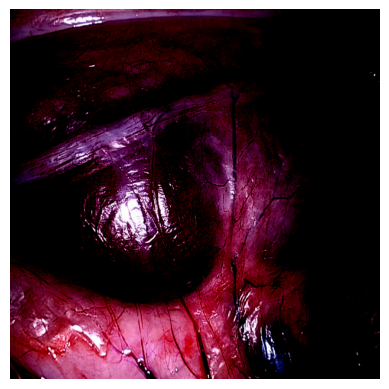

In [4]:
import matplotlib.pyplot as plt

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide axis labels and ticks
plt.show()

In [51]:
import tensorflow as tf

# Specify the path to your image
image_path = '/content/drive/MyDrive/medical_robotics/v1/v1/frame_rgb/000000.png'

# Load the image without resizing or preprocessing
image = tf.io.read_file(image_path)
image = tf.image.decode_image(image, channels=3)

In [52]:
import tensorflow as tf

# Specify the path to your image
image_path_1 = '/content/drive/MyDrive/medical_robotics/v1/v1/frame_rgb/000001.png'

# Load the image without resizing or preprocessing
image_1 = tf.io.read_file(image_path_1)
image_1 = tf.image.decode_image(image_1, channels=3)

In [41]:
image_1.shape

TensorShape([1024, 1280, 3])

In [42]:
import numpy as np
a = np.array([image,image_1])

In [32]:
a = np.array([image])

In [37]:
a = np.array([a,image_1])

<ipython-input-37-b077989cc5ef>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a = np.array([a,image_1])


In [23]:
a.shape

(2, 1024, 1280, 3)

In [47]:
f = np.array([])
a = image

In [79]:
a = [0]*2
a[0] = image
a[1] = image_1


In [80]:
a

[<tf.Tensor: shape=(1024, 1280, 3), dtype=uint8, numpy=
 array([[[121,  76,  98],
         [121,  76,  98],
         [122,  77,  99],
         ...,
         [ 30,  23,  28],
         [ 30,  23,  28],
         [ 30,  23,  28]],
 
        [[123,  79, 100],
         [123,  79, 100],
         [124,  80, 102],
         ...,
         [ 30,  23,  28],
         [ 30,  23,  28],
         [ 30,  23,  28]],
 
        [[125,  81, 103],
         [127,  82, 104],
         [129,  84, 106],
         ...,
         [ 30,  23,  28],
         [ 30,  23,  28],
         [ 30,  23,  28]],
 
        ...,
 
        [[103,  59,  77],
         [106,  62,  79],
         [109,  65,  82],
         ...,
         [ 73,  46,  62],
         [ 72,  45,  61],
         [ 71,  43,  60]],
 
        [[116,  72,  91],
         [114,  70,  89],
         [109,  65,  84],
         ...,
         [ 75,  47,  63],
         [ 72,  45,  61],
         [ 71,  43,  60]],
 
        [[120,  79,  97],
         [116,  74,  93],
         [10

In [81]:
dataset = np.stack(a, axis=0)

In [92]:
dataset.shape

(197, 1024, 1280, 3)

In [100]:
file_num = 000000
a =[0]*197
for i in range(0,count):
  image_path = '/content/drive/MyDrive/medical_robotics/v1/v1/frame_rgb/'+ str(file_num + i).zfill(6)+'.png'
  # Load the image without resizing or preprocessing
  image_1 = tf.io.read_file(image_path)
  image_1= tf.image.decode_image(image_1, channels=3)
  a[i] = image_1


In [91]:
dataset = np.stack(a, axis=0)

In [93]:
dataset.shape

(197, 1024, 1280, 3)

In [97]:
np.save('/content/drive/MyDrive/medical_robotics/dataset.npy', dataset)

In [ ]:
for i

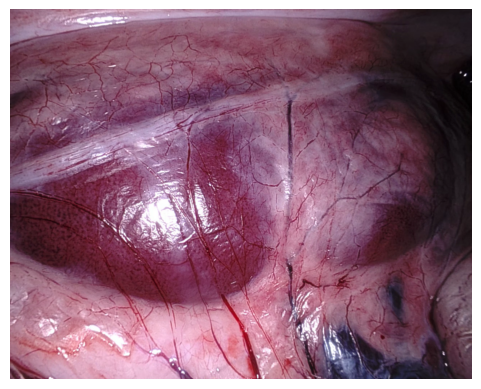

In [6]:
import matplotlib.pyplot as plt

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide axis labels and ticks
plt.show()

In [ ]:
image

<tf.Tensor: shape=(1024, 1280, 3), dtype=uint8, numpy=
array([[[121,  76,  98],
        [121,  76,  98],
        [122,  77,  99],
        ...,
        [ 30,  23,  28],
        [ 30,  23,  28],
        [ 30,  23,  28]],

       [[123,  79, 100],
        [123,  79, 100],
        [124,  80, 102],
        ...,
        [ 30,  23,  28],
        [ 30,  23,  28],
        [ 30,  23,  28]],

       [[125,  81, 103],
        [127,  82, 104],
        [129,  84, 106],
        ...,
        [ 30,  23,  28],
        [ 30,  23,  28],
        [ 30,  23,  28]],

       ...,

       [[103,  59,  77],
        [106,  62,  79],
        [109,  65,  82],
        ...,
        [ 73,  46,  62],
        [ 72,  45,  61],
        [ 71,  43,  60]],

       [[116,  72,  91],
        [114,  70,  89],
        [109,  65,  84],
        ...,
        [ 75,  47,  63],
        [ 72,  45,  61],
        [ 71,  43,  60]],

       [[120,  79,  97],
        [116,  74,  93],
        [107,  66,  84],
        ...,
        [ 70,  48, 

In [ ]:
image[0]

<tf.Tensor: shape=(1280, 3), dtype=uint8, numpy=
array([[121,  76,  98],
       [121,  76,  98],
       [122,  77,  99],
       ...,
       [ 30,  23,  28],
       [ 30,  23,  28],
       [ 30,  23,  28]], dtype=uint8)>

NameError: ignored

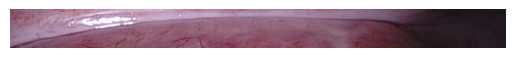

In [ ]:
plt.imshow(image[0:100][0:1000])
plt.axis('off')  # Hide axis labels and ticks
iplt.show()

In [ ]:
import numpy as np
image = np.array(image)

In [ ]:
image[1][1][0]

123

In [ ]:
image_R = np.zeros((1024,1280))

In [ ]:
for i in range(1024):  #we are trying to extract only one component from the RGB images (so we can see that with i,j we select the pixel positon and then we have 3 values that are referring to the RGB-)
                       #it's not possible to modify the tensor frame, so we have conver it in a array frame (we are able to plot it)
  for j in range(1280):
    for k in [0,1]:
     image[i][j][k] = 0;  #in this case we are extracting only 1 color

image

array([[[  0,   0,  98],
        [  0,   0,  98],
        [  0,   0,  99],
        ...,
        [  0,   0,  28],
        [  0,   0,  28],
        [  0,   0,  28]],

       [[  0,   0, 100],
        [  0,   0, 100],
        [  0,   0, 102],
        ...,
        [  0,   0,  28],
        [  0,   0,  28],
        [  0,   0,  28]],

       [[  0,   0, 103],
        [  0,   0, 104],
        [  0,   0, 106],
        ...,
        [  0,   0,  28],
        [  0,   0,  28],
        [  0,   0,  28]],

       ...,

       [[  0,   0,  77],
        [  0,   0,  79],
        [  0,   0,  82],
        ...,
        [  0,   0,  62],
        [  0,   0,  61],
        [  0,   0,  60]],

       [[  0,   0,  91],
        [  0,   0,  89],
        [  0,   0,  84],
        ...,
        [  0,   0,  63],
        [  0,   0,  61],
        [  0,   0,  60]],

       [[  0,   0,  97],
        [  0,   0,  93],
        [  0,   0,  84],
        ...,
        [  0,   0,  60],
        [  0,   0,  60],
        [  0,   0,  59]]

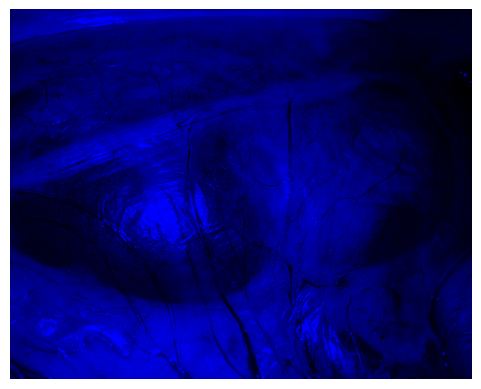

In [ ]:
import matplotlib.pyplot as plt

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide axis labels and ticks
plt.show()

In [ ]:
# standardization of a image
image = tf. convert_to_tensor(image)
new_image = tf.image.per_image_standardization(image)

In [ ]:
new_image

<tf.Tensor: shape=(1024, 1280, 3), dtype=float32, numpy=
array([[[ 0.24972096, -0.53769785, -0.15273756],
        [ 0.24972096, -0.53769785, -0.15273756],
        [ 0.26721916, -0.52019966, -0.13523936],
        ...,
        [-1.3426149 , -1.4651023 , -1.3776113 ],
        [-1.3426149 , -1.4651023 , -1.3776113 ],
        [-1.3426149 , -1.4651023 , -1.3776113 ]],

       [[ 0.28471735, -0.4852033 , -0.11774116],
        [ 0.28471735, -0.4852033 , -0.11774116],
        [ 0.30221555, -0.4677051 , -0.08274477],
        ...,
        [-1.3426149 , -1.4651023 , -1.3776113 ],
        [-1.3426149 , -1.4651023 , -1.3776113 ],
        [-1.3426149 , -1.4651023 , -1.3776113 ]],

       [[ 0.31971374, -0.4502069 , -0.06524657],
        [ 0.35471013, -0.4327087 , -0.04774838],
        [ 0.38970655, -0.39771232, -0.01275198],
        ...,
        [-1.3426149 , -1.4651023 , -1.3776113 ],
        [-1.3426149 , -1.4651023 , -1.3776113 ],
        [-1.3426149 , -1.4651023 , -1.3776113 ]],

       ...,

   

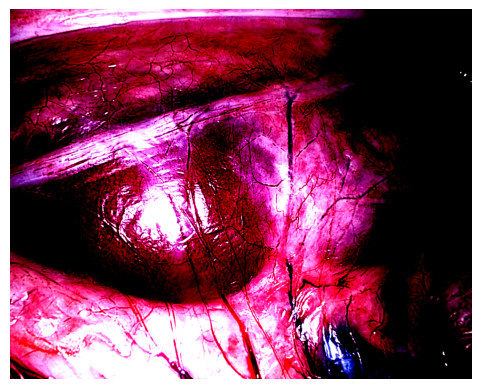

In [ ]:
import matplotlib.pyplot as plt

# Display the image
plt.imshow(new_image)
plt.axis('off')  # Hide axis labels and ticks
plt.show()

In [ ]:
  import tensorflow as tf

In [ ]:
file_num = 000000
for i in range(2):
  # Specify the path to your image
  image_path = '/content/drive/MyDrive/medical_robotics/v1/v1/frame_rgb/' + str(file_num + i).zfill(6) + '.png'

  # Load the image without resizing or preprocessing
  image = tf.io.read_file(image_path)
  image = tf.image.decode_image(image, channels=3)
  new_image = tf.image.per_image_standardization(image)
  print(new_image)
  input() #to pause the for loop

  path = '/content/drive/MyDrive/medical_robotics/' + str(i)
  tf.keras.utils.save_img(path,np.array(new_image),data_format='channels_last',file_format='png',scale=False)



tf.Tensor(
[[[ 0.24972096 -0.53769785 -0.15273756]
  [ 0.24972096 -0.53769785 -0.15273756]
  [ 0.26721916 -0.52019966 -0.13523936]
  ...
  [-1.3426149  -1.4651023  -1.3776113 ]
  [-1.3426149  -1.4651023  -1.3776113 ]
  [-1.3426149  -1.4651023  -1.3776113 ]]

 [[ 0.28471735 -0.4852033  -0.11774116]
  [ 0.28471735 -0.4852033  -0.11774116]
  [ 0.30221555 -0.4677051  -0.08274477]
  ...
  [-1.3426149  -1.4651023  -1.3776113 ]
  [-1.3426149  -1.4651023  -1.3776113 ]
  [-1.3426149  -1.4651023  -1.3776113 ]]

 [[ 0.31971374 -0.4502069  -0.06524657]
  [ 0.35471013 -0.4327087  -0.04774838]
  [ 0.38970655 -0.39771232 -0.01275198]
  ...
  [-1.3426149  -1.4651023  -1.3776113 ]
  [-1.3426149  -1.4651023  -1.3776113 ]
  [-1.3426149  -1.4651023  -1.3776113 ]]

 ...

 [[-0.06524657 -0.8351672  -0.52019966]
  [-0.01275198 -0.78267264 -0.4852033 ]
  [ 0.03974261 -0.73017806 -0.4327087 ]
  ...
  [-0.5901925  -1.0626438  -0.78267264]
  [-0.6076907  -1.080142   -0.80017084]
  [-0.6251889  -1.1151384  -0.817